 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending = True, inplace = True)
whale_df.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Count nulls
# Check for nulls
whale_df.isnull().mean() * 100
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
# Validate no more missing values
whale_df.isnull().sum()
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending = True, inplace = True)
algo_df.head() 

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().mean() * 100
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
# Validate no more missing values
algo_df.isnull().sum()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending = True, inplace = True)
sp500_df.head() 

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df['Close'].dtype

dtype('O')

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df['Close']

C:\Users\RUTAT\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [11]:
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtype

dtype('float64')

In [12]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns = {"Close":"sp500"})
sp500_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df,sp500_returns], axis = "columns",join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

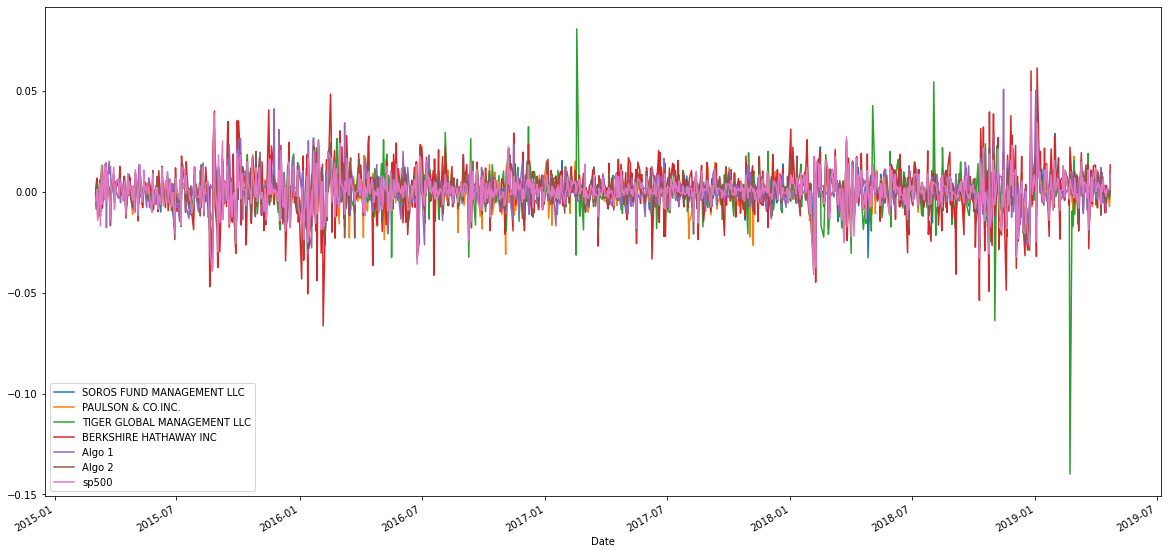

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

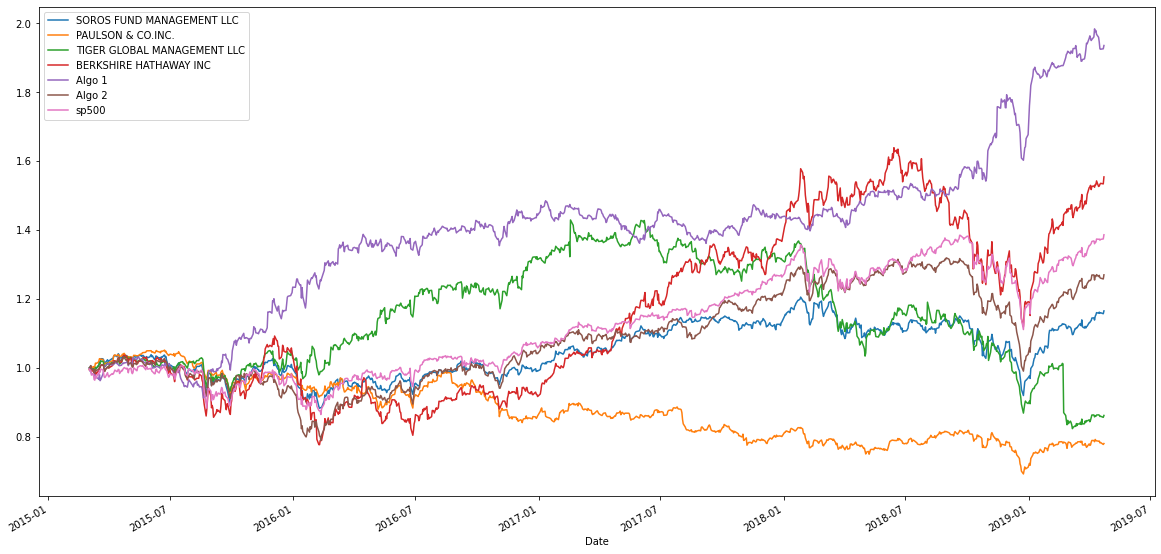

In [17]:
# Calculate cumulative returns of all portfolios
df_cumu = (1+ combined_df).cumprod()
# Plot cumulative returns
df_cumu.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

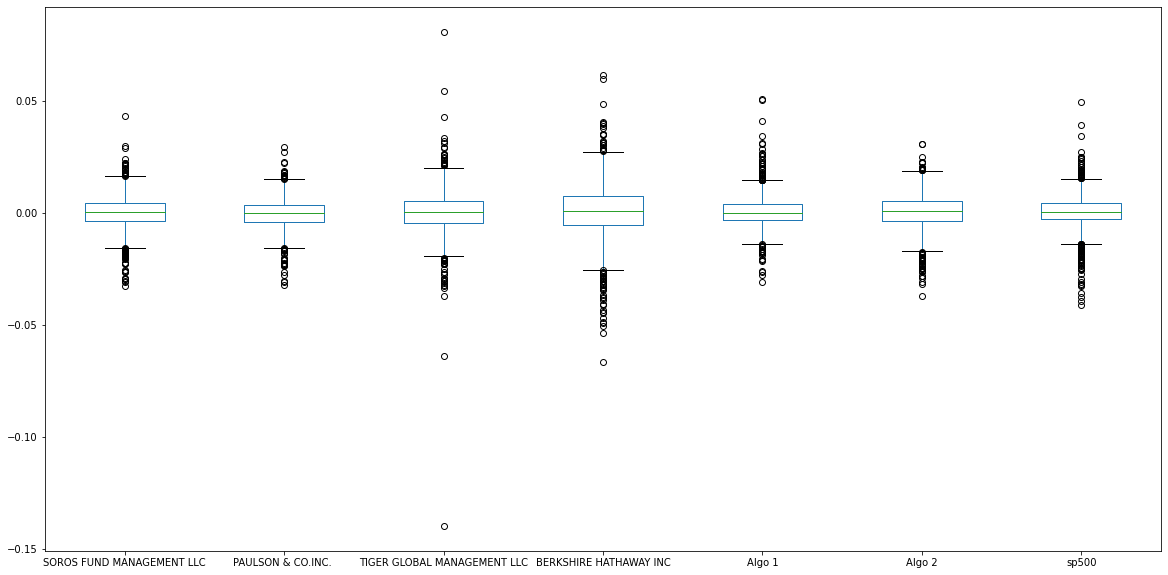

In [18]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
combined_df_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
riskiest_std = combined_df_std[combined_df_std["std"] >combined_df_std.loc["sp500", "std"]]
riskiest_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std =  combined_df_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

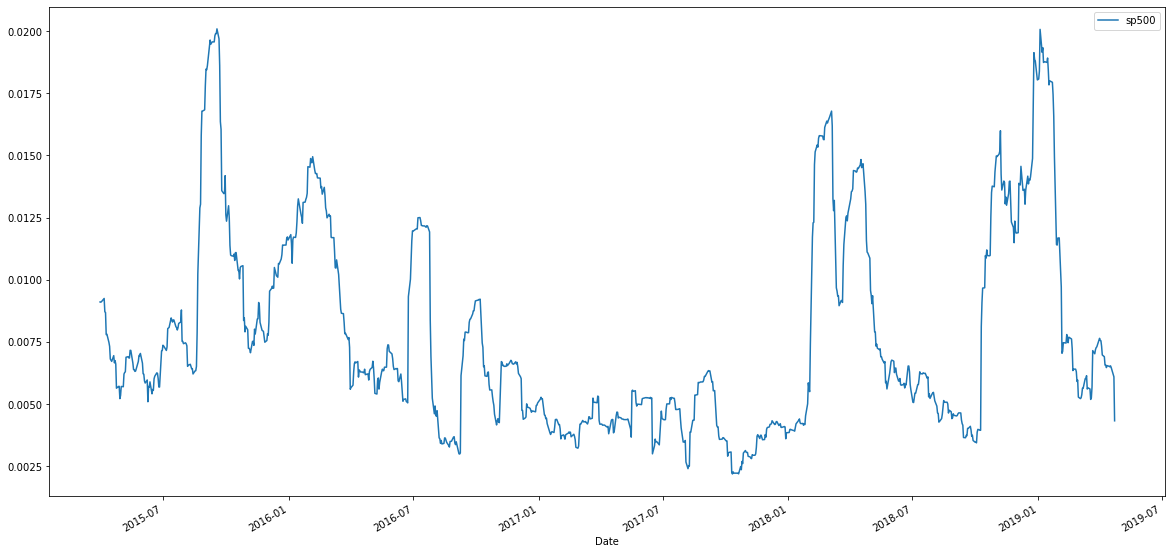

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21 = combined_df[["sp500"]].rolling(window = 21).std()
# Plot the rolling standard deviation
sp500_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

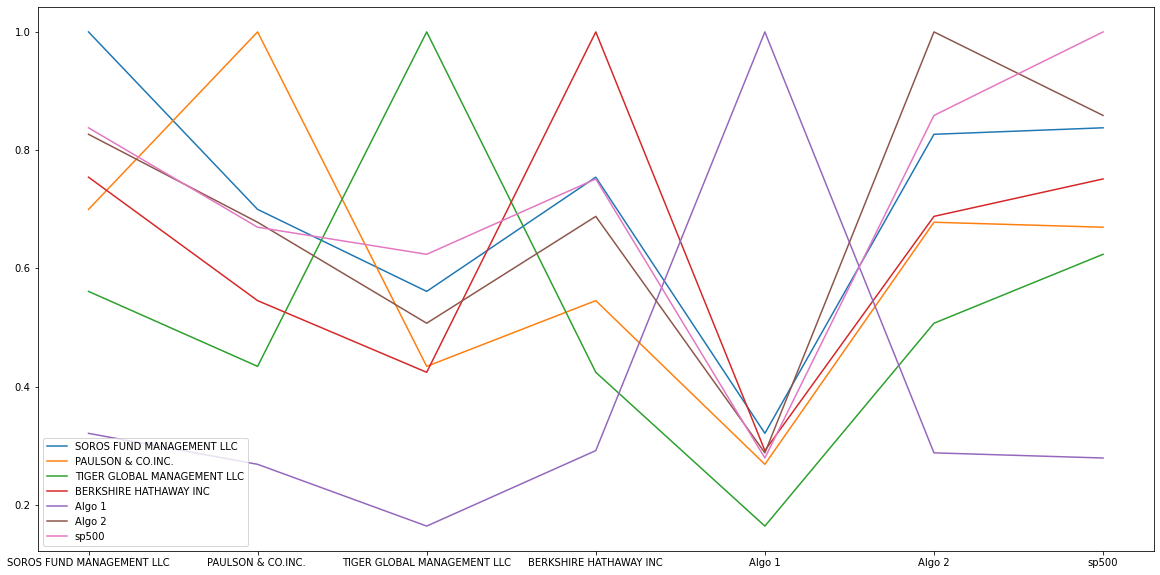

In [23]:
# Calculate the correlation
correlation_sp500 = combined_df.corr()
correlation_sp500
# Display de correlation matrix
correlation_sp500.plot(figsize = (20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 90-Day Beta of TGM'}, xlabel='Date'>

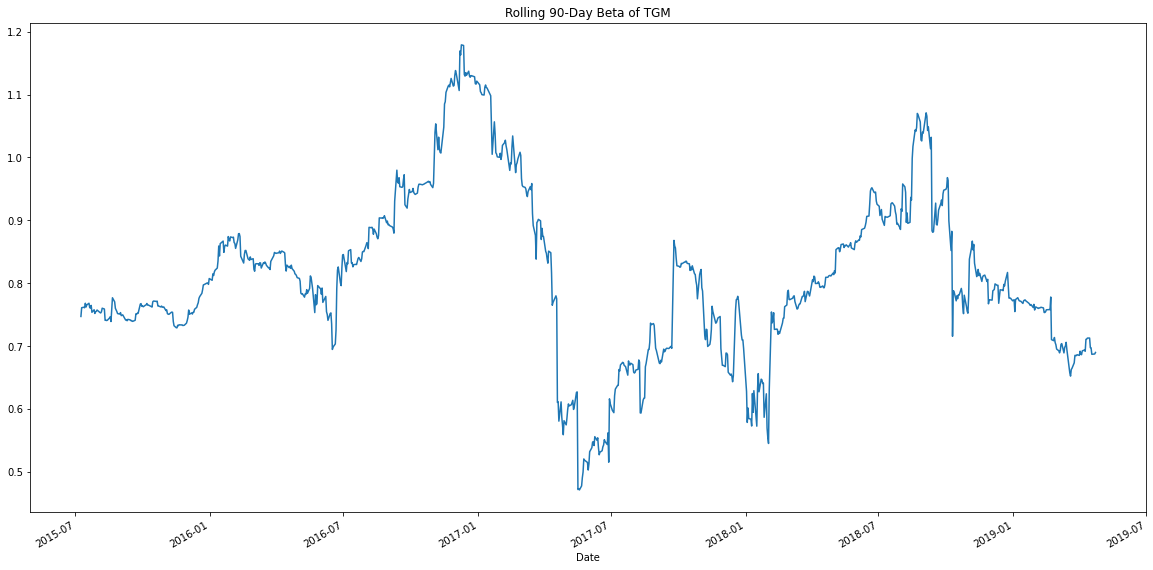

In [24]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=90).cov(combined_df['sp500'])
# Calculate variance of S&P 500
rolling_variance = combined_df['sp500'].rolling(window=90).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 90-Day Beta of TGM')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

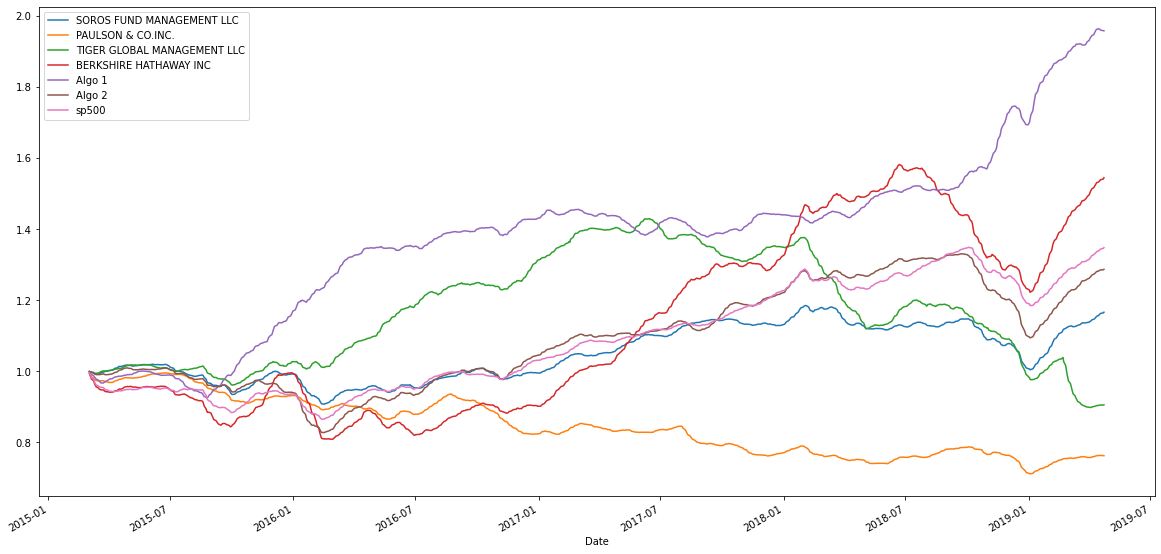

In [25]:
# Use `ewm` to calculate the rolling window
combined_df_ewm = combined_df.ewm(span = 21,adjust = False).mean()
(1 + combined_df_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

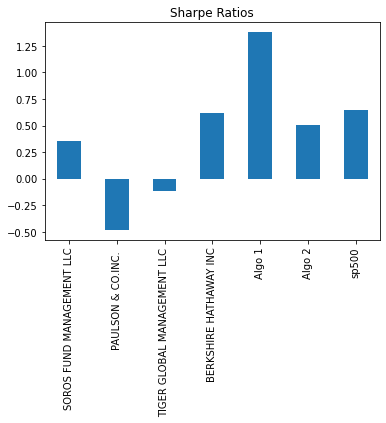

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

## Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
# Algo 1 outpeformed the market, while the whale perfolio and Algo 2 performed worse than the market. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
tsla_history = Path("Resources/tsla_historical.csv")
tsla_df = pd.read_csv(tsla_history, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
tsla_df.sort_index(ascending = True, inplace = True)
tsla_df.rename(columns = {"Close":"TSLA"}, inplace = True)
tsla_df.head() 

,TSLA
Date,
2014-01-02,30.02
2014-01-03,29.91
2014-01-06,29.40
2014-01-07,29.87
2014-01-08,30.26


In [29]:
# Reading data from 2nd stock
nvda_history = Path("Resources/NVDA_historical.csv")
nvda_df = pd.read_csv(nvda_history, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
nvda_df.sort_index(ascending = True, inplace = True)
nvda_df.rename(columns = {"Close":"NVDA"}, inplace = True)
nvda_df.head() 

,NVDA
Date,
2014-01-02,15.86
2014-01-03,15.67
2014-01-06,15.88
2014-01-07,16.14
2014-01-08,16.36


In [30]:
# Reading data from 3rd stock
atvi_history = Path("Resources/ATVI_histirical.csv")
atvi_df = pd.read_csv(atvi_history, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
atvi_df.sort_index(ascending = True, inplace = True)
atvi_df.rename(columns = {"Close":"ATVI"}, inplace = True)
atvi_df.head() 

,ATVI
Date,
2014-01-02,18.07
2014-01-03,18.29
2014-01-04,18.08
2014-01-05,18.32
2014-01-06,18.34


In [31]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat((tsla_df, nvda_df, atvi_df), axis = "columns", join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,TSLA,NVDA,ATVI
Date,,,
2014-01-02,30.02,15.86,18.07
2014-01-03,29.91,15.67,18.29
2014-01-06,29.40,15.88,18.34
2014-01-07,29.87,16.14,18.30
2014-01-08,30.26,16.36,18.18


In [32]:
# Reset Date index
my_stocks.index = my_stocks.index.normalize()

In [33]:
# Reorganize portfolio data by having a column per symbol


In [34]:
# Calculate daily returns
my_stocks_returns = my_stocks.pct_change()
# Drop NAs
my_stocks_returns = my_stocks_returns.dropna()
# Display sample data
my_stocks_returns.head()

,TSLA,NVDA,ATVI
Date,,,
2014-01-03,-0.003664,-0.011980,0.012175
2014-01-06,-0.017051,0.013401,0.002734
2014-01-07,0.015986,0.016373,-0.002181
2014-01-08,0.013057,0.013631,-0.006557
2014-01-09,-0.024785,-0.037286,-0.017052


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = my_stocks_returns.dot(weights)
portfolio_returns.head()
# Display sample data
portfolio_returns.head()

Date
2014-01-03   -0.001156
2014-01-06   -0.000305
2014-01-07    0.010059
2014-01-08    0.006710
2014-01-09   -0.026374
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((portfolio_returns,combined_df), axis = "columns", join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2015-03-03,0.001820,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.009634,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004113,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.009001,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.010271,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...,...
2018-02-12,0.002886,0.015751,0.006872,0.009962,0.016198,0.014104,0.012201,0.013915
2018-02-13,0.015572,0.000000,0.000000,0.000000,0.000000,-0.002735,0.005228,0.002613
2018-02-14,0.009347,0.018339,0.014346,0.006289,0.020123,0.015205,0.017153,0.013402


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns = portfolio_returns.dropna()
portfolio_returns.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2015-03-03,0.001820,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.009634,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004113,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.009001,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.010271,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.015320
SOROS FUND MANAGEMENT LLC,0.007183
PAULSON & CO.INC.,0.006918
TIGER GLOBAL MANAGEMENT LLC,0.009184
BERKSHIRE HATHAWAY INC,0.012165
Algo 1,0.007502
Algo 2,0.008234
sp500,0.008000


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 90-Day Beta of Combined Portfolio'}, xlabel='Date'>

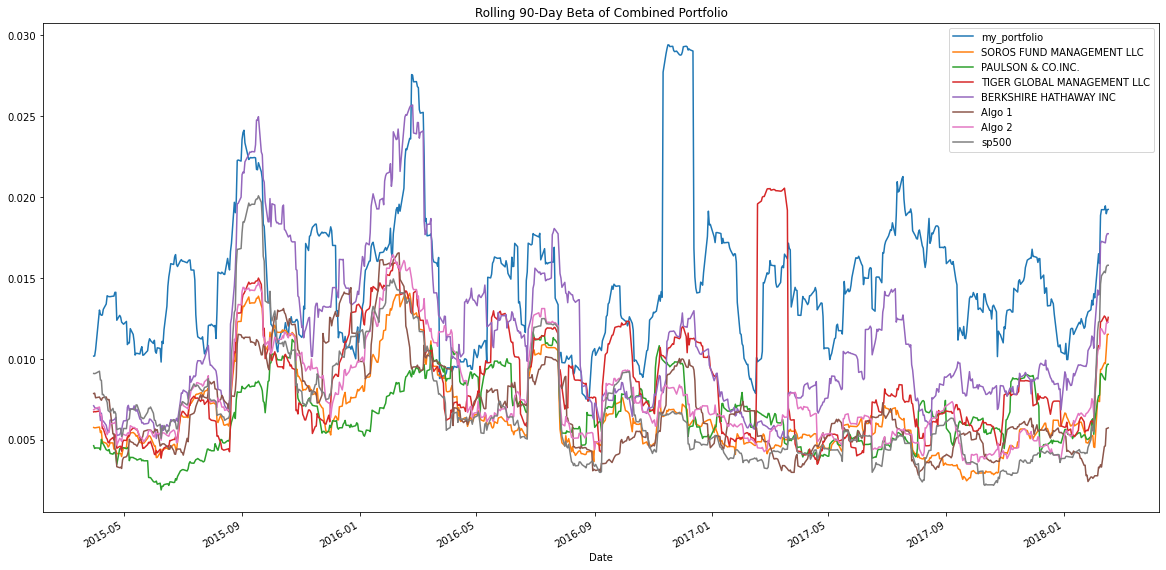

In [47]:
# Calculate rolling standard deviation
portfolio_rolling_21 = portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
portfolio_rolling_21.plot(figsize=(20, 10), title='Rolling 90-Day Beta of Combined Portfolio')

### Calculate and plot the correlation

<AxesSubplot:>

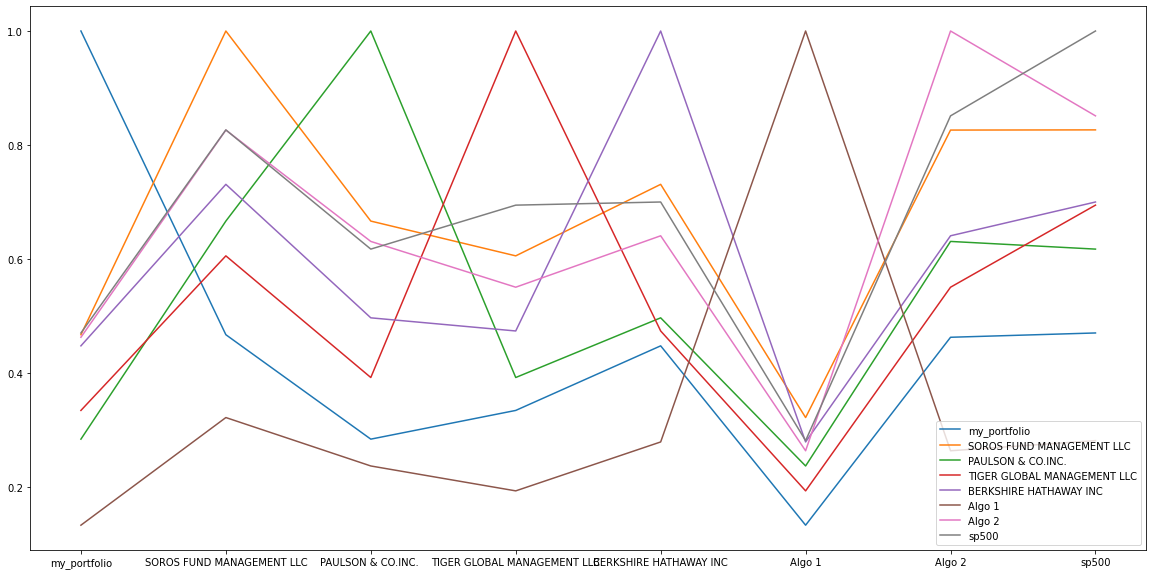

In [48]:
# Calculate and plot the correlation
correlation_portfolio = portfolio_returns.corr()
correlation_portfolio.plot(figsize = (20,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

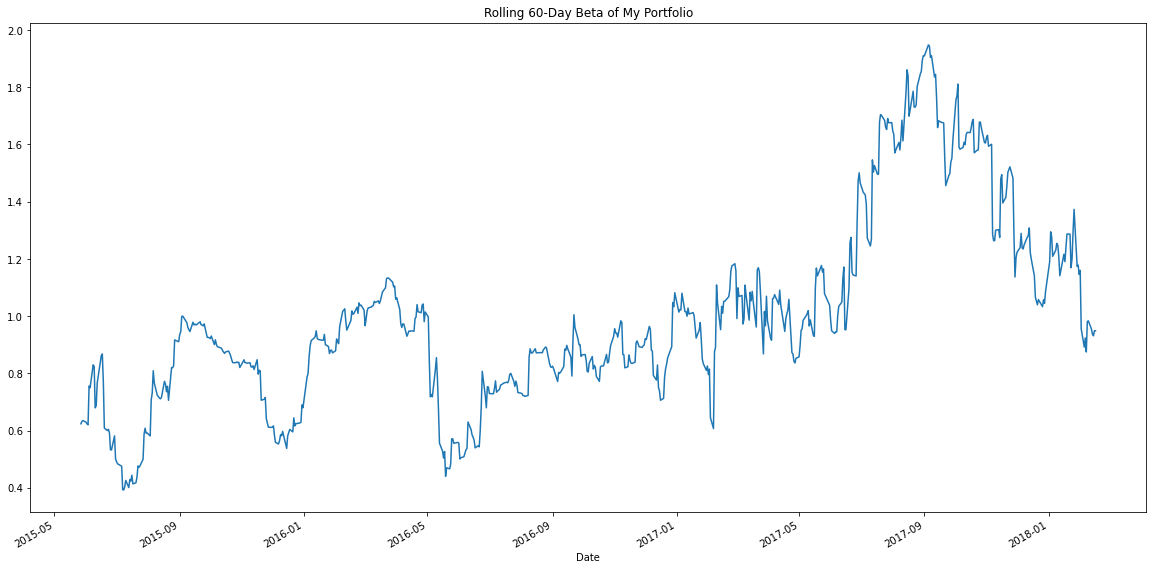

In [49]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
rolling_covariance_2 = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['sp500'])
# Calculate variance of S&P 500
rolling_variance_2 = portfolio_returns['sp500'].rolling(window=60).var()
# Computing beta
rolling_beta_2 = rolling_covariance_2 / rolling_variance_2
# Plot beta trend
rolling_beta_2.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_2 = portfolio_returns.mean()*252/(portfolio_returns.std()*np.sqrt(252))
sharpe_ratios_2

my_portfolio                   1.988865
SOROS FUND MANAGEMENT LLC      0.562560
PAULSON & CO.INC.             -0.669459
TIGER GLOBAL MANAGEMENT LLC    0.586144
BERKSHIRE HATHAWAY INC         0.789753
Algo 1                         1.093251
Algo 2                         0.642274
sp500                          0.740056
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

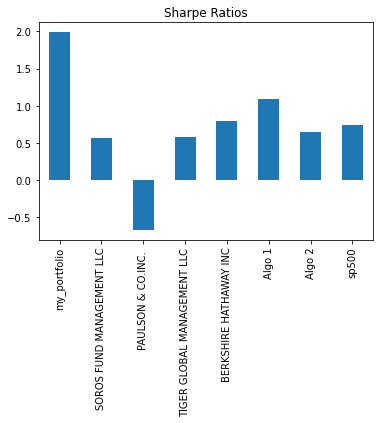

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
## Compared to the SP&500 my Porfolio does very well with a sharpe ratio of 1.98.